In [ ]:
import cv2
import numpy as np


In [ ]:
path = '/frame155.jpg'
img = cv2.imread(path)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgContour = img.copy()

In [ ]:
def remove_noise (mask):
    Erokerne = np.ones((6, 6), np.uint8)  # from 0 to 255
    Dikernel = np.ones((3, 3), np.uint8)  # from 0 to 255

    # to remove image noise
    imgEroded = cv2.erode(mask, Erokerne, iterations=4)
    imgDialated = cv2.dilate(imgEroded, Dikernel, iterations=8)
    return imgDialated

In [ ]:
def nearGate (imgHSV):
    # near gate color detection
    lower = np.array([0, 0, 0])
    upper = np.array([79, 184, 255])
    mask = cv2.inRange(imgHSV, lower, upper)
    clear_Mask =remove_noise(mask)
    return clear_Mask

In [ ]:
def farGate (imgHSV):
    # far gate color detection
    lower = np.array([0, 0, 0])
    upper = np.array([179, 131, 255])
    mask = cv2.inRange(imgHSV, lower, upper)
    clear_Mask = remove_noise(mask)
    return clear_Mask

In [ ]:



contours =[]
x_arr = []
gate_arr = []
y_arr = []
w_arr =[]

In [ ]:
def getContours(imgHSV, imgContour):
    flage = True
    Nmask = nearGate(imgHSV)
    # contour detection
    retrieval_mod = cv2.RETR_EXTERNAL
    Ncontours, Nhierarchy = cv2.findContours(Nmask, retrieval_mod, cv2.CHAIN_APPROX_NONE)

    # if there is no gate detected (may be far)
    if len(Ncontours) < 3:
        Fmask = farGate(imgHSV)
        Fcontours, Fhierarchy = cv2.findContours(Fmask, retrieval_mod, cv2.CHAIN_APPROX_NONE)
        contours = Fcontours
        # not near or far (no gate)
        if len(contours) == 0:
            flage = False
    else:
        contours = Ncontours

    if flage:
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:
                curveLength = cv2.arcLength(cnt, True)
                approx_corner_points = cv2.approxPolyDP(cnt, 0.02 * curveLength, True)
                Num_objCorners = len(approx_corner_points)

                if Num_objCorners > 3 and Num_objCorners < 15:
                    x, y, w, h = cv2.boundingRect(approx_corner_points)
                    x_arr.append(x), gate_arr.append(y + h - w), y_arr.append(y), w_arr.append(w)
                else:
                    pass
        if gate_arr:
            gate_hight1 = max(gate_arr)
            indx1 = gate_arr.index(max(gate_arr))
            gate_arr[indx1] = 0
            indx2 = gate_arr.index(max(gate_arr))

            if abs(x_arr[indx1]-x_arr[indx2])>100:

                if x_arr[indx1] > x_arr[indx2]:
                    cv2.rectangle(imgContour, (x_arr[indx1], y_arr[indx1] - 50), (x_arr[indx2], gate_hight1), (100, 255, 100),
                                  20)
                else:
                    cv2.rectangle(imgContour, (x_arr[indx2], y_arr[indx1] - 50), (x_arr[indx1], gate_hight1), (100, 255, 100),
                                  20)

                cv2.putText(imgContour, 'Gate',
                            (x_arr[indx1], y_arr[indx1] - 100), cv2.Formatter_FMT_MATLAB, 5,
                            (100, 255, 100), 10)

                # to detect the narrower pass (bonus)
                y_arr[indx1] = 0
                y_arr[indx2] = 0
                bindx = y_arr.index(max(y_arr))

                if max(x_arr) < x_arr[bindx] + 120 or min(x_arr) > x_arr[bindx] - 120:
                    pass
                elif abs(x_arr[bindx] - x_arr[indx1]) > abs(x_arr[bindx] - x_arr[indx2]):
                    cv2.rectangle(imgContour, (x_arr[bindx], y_arr[bindx]), (x_arr[indx2], gate_hight1), (200, 0, 255), 10)
                    cv2.putText(imgContour, 'bouns entry',
                                (x_arr[bindx], y_arr[bindx] - 50), cv2.Formatter_FMT_MATLAB, 5,
                                (000, 0, 255), 10)
                else:
                    cv2.rectangle(imgContour, (x_arr[bindx], y_arr[bindx]), (x_arr[indx1], gate_hight1), (200, 0, 255), 10)
                    cv2.putText(imgContour, 'bouns entry',
                                (x_arr[bindx], y_arr[bindx] - 50), cv2.Formatter_FMT_MATLAB, 5, (000, 0, 255), 10)





In [ ]:
getContours(imgHSV,imgContour)

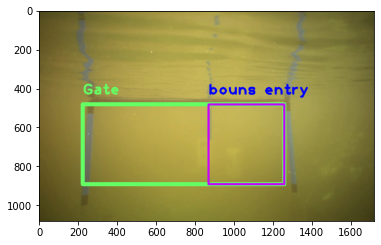

In [ ]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(imgContour)
plt.show()